In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#导入数据
df = pd.read_csv('train.csv')
#显示前5条数据
# print(df.head(8))

df.info()
#显示数值列的基本情况
df.describe()

#存在缺失值的列为Embarked,缺失2个数值，Cabin,Age中存在的缺失值较多，后续通过分析补齐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#分析各列中值的种类
clist = ['Pclass','Name','Sex','SibSp','Embarked','Parch','Ticket','Cabin']
for l in clist:
    print('%s的值的种类有%s个'%(l,df[l].value_counts().index.shape[0]))

#Name,Ticket,Cabin中值的种类太多,不适合做可视化处理,可以进行单独分析
#其他几个列中的值可以进行可视化分析探究其中的规律

Pclass的值的种类有3个
Name的值的种类有891个
Sex的值的种类有2个
SibSp的值的种类有7个
Embarked的值的种类有3个
Parch的值的种类有7个
Ticket的值的种类有681个
Cabin的值的种类有147个


In [ ]:
# 对于PassengerId,Pclass,SibSp,Parch,Survived字段无异常，无需处理
# PassengerId为序号
# Pclass为仓位号,1-3
# SibSp为兄弟的数量
# Parch为父母子女的数量
# Survived为获救的结果,1表示获救,0表示没有获救

In [35]:
# 分析Age,Fare数值

# 对于Age字段,只有714个数值,缺失值需要在后面进行处理
age = df['Age']
# print('age:',age)
#求出age字段的上下四分位值,k值取1.5
print("四分位值分析")
ah = age.quantile(q=0.75)
al = age.quantile(q=0.25)
a_interval = ah - al
print('四分间距:',a_interval)
k = 1.5

#a_h和a_l分别为上下质信区间
a_h = ah + k * a_interval
a_l = al - k * a_interval
print('上界:',a_h)
print('下界:',a_l)
print('超出上界的数量:',age[age > a_h].count())
print('超出下界的数量:',age[age < a_l].count())

print("----------------------------------------")

print("正态分布分析")
age_mean = age.mean()
print('平均数:',age_mean)
age_std = age.std()
print('标准差:',age_std)

#采用偏差在2倍标准差内的值作为置信区间
a_hh = age_mean + age_std * 2
a_ll = age_mean - age_std * 2

print('上界:',a_hh)
print('下界:',a_ll)
print('超出上界的数量:',age[age > a_hh].count())
print('超出下界的数量:',age[age < a_ll].count())
#分别进行四分位值和正态分布分析,超出上下界的值的部分需要在后续分析过程中重点分析

四分位值分析
四分间距: 13.0
上界: 54.5
下界: 2.5
超出上界的数量: 42
超出下界的数量: 24
----------------------------------------
正态分布分析
平均数: 29.36158249158249
标准差: 13.019696550973194
上界: 55.40097559352888
下界: 3.322189389636101
超出上界的数量: 40
超出下界的数量: 30


D:\anaconda_project\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda_project\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0,0.5,'Frequency')

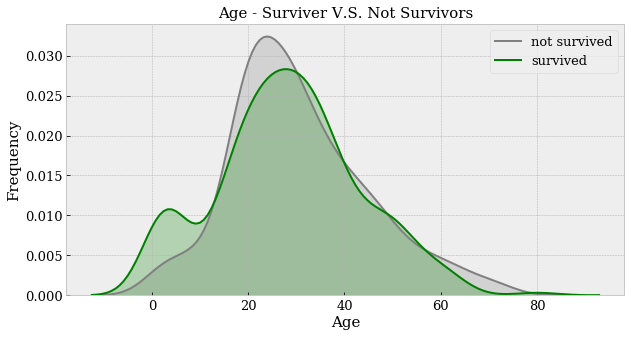

In [24]:
f,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age - Surviver V.S. Not Survivors', fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
#在获救与没有获救人群中，只要在15岁之前人群存在差异

In [41]:
# 对于Fare字段
fare = df['Fare']
# print(fare)
#求出Fare字段的上下四分位值,k值取1.5
print("四分位值分析")
fh = fare.quantile(q=0.75)
fl = fare.quantile(q=0.25)
f_interval = fh - fl
print('四分间距:',a_interval)
k = 1.5

#a_h和a_l分别为上下质信界限
f_h = fh + k * f_interval
f_l = fl - k * f_interval

print('上界:',f_h)
print('下界:',f_l)
print('超出上界的数量:',fare[fare > f_h].count())
print('超出下界的数量:',fare[fare < f_l].count())

print("----------------------------------------")

print("正态分布分析")
fare_mean = fare.mean()
print('平均数:',fare_mean)
fare_std = fare.std()
print('标准差:',fare_std)

#采用偏差在2倍标准差内的值作为置信区间
f_hh = fare_mean + fare_std * 2
f_ll = fare_mean - fare_std * 2

print('上界:',f_hh)
print('下界:',f_ll)
print('超出上界的数量:',fare[fare > f_hh].count())
print('超出下界的数量:',fare[fare < f_ll].count())

四分位值分析
四分间距: 13.0
上界: 65.6344
下界: -26.724
超出上界的数量: 116
超出下界的数量: 0
----------------------------------------
正态分布分析
平均数: 32.2042079685746
标准差: 49.693428597180905
上界: 131.59106516293642
下界: -67.1826492257872
超出上界的数量: 38
超出下界的数量: 0


In [63]:
#对于age的缺失值使用平均数填充
# df['Age'] = df['Age'].fillna(df['Age'].mean())

In [31]:
# Pclass,Age,SibSp,Parch,Fare,Sex,Embarked 此七类作为回归分析的列
# 对于Sex和Embarked需要替换成整数进行分析

# # Sex列中的值为'male','female',分别替换为0,1,以方便后续的分析建模
# print(df['Sex'].unique()
df.loc[df['Sex'] == 'male','Sex'] = 0
df.loc[df['Sex'] == 'female','Sex'] = 1
print(df['Sex'].unique())

# Embarked列中的值为'S','C','Q',分别替换为0,1,2,以方便后续的分析建模
print(df['Embarked'].unique())
df["Embarked"] = df["Embarked"].fillna('S')
df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2
print(df['Embarked'].unique())


[0 1]
['S' 'C' 'Q' nan]
[0 1 2]


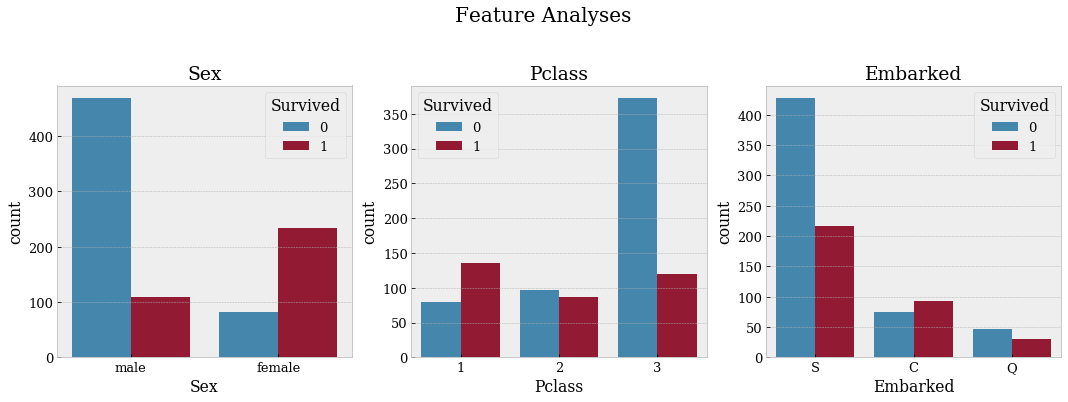

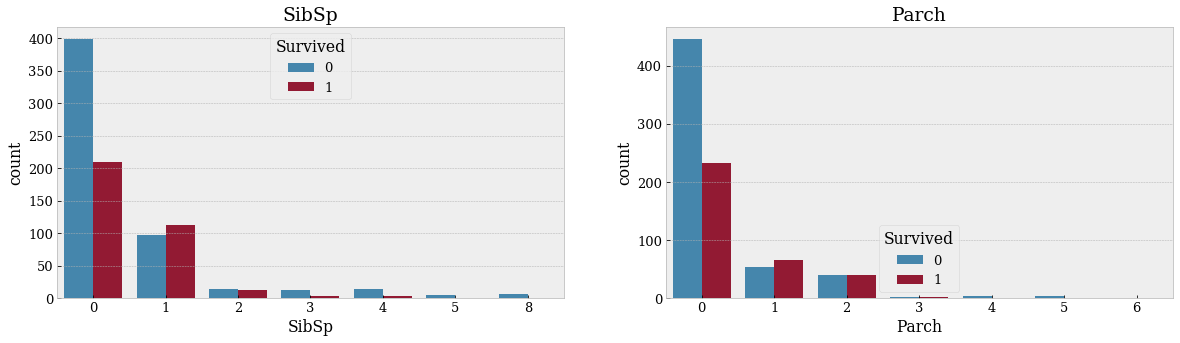

In [6]:
import seaborn as sns
plt.style.use("bmh")
plt.rc('font', family='serif', size=13)

# 以下进行可视化分析
f, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(18,5))
#Sex与Survived
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax1)
#Pclass与Survived
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax2)
#Embarked与Survived
sns.countplot(x='Embarked', hue='Survived', data=df, ax=ax3)
ax1.set_title('Sex')
ax2.set_title('Pclass')
ax3.set_title('Embarked')
f.suptitle('Feature Analyses',size=20,y=1.1)

f, [ax1,ax2] = plt.subplots(1,2,figsize=(20,5))
#SibSp与Survived
sns.countplot(x='SibSp', hue='Survived', data=df, ax=ax1)
#Parch与Survived
sns.countplot(x='Parch', hue='Survived', data=df, ax=ax2)
ax1.set_title('SibSp')
ax2.set_title('Parch')

plt.show()

In [ ]:
#从以上图形显示可以得出
#Sex  女性的存活率大于男性，男性的人数更多
#Pclass  3等仓的人数最多，1等仓获救率最高
#Embarked  去往S的人数最多，获救率最低，去往C的获救率最高
#SibSp  值为0的人数最多，值为1的获救率最高
#Parch 值为0的人数最多，值为1,2的获救率较高,与SibSp中的规律类似

In [ ]:
# 分析Sex，Pclass与Embarked之间的关系
grid = sns.FacetGrid(df, col='Pclass', hue='Sex', palette='seismic', size=5)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()

#Pclass为1和2时，几乎不从Q港口逃走，而3等仓中决大部分从S港口逃走，可以推测Q港口的生还率较低 ，可能为普通港口，S和C港口可能为高级港口
#1等仓和2等仓的女性占总人数比3等仓多

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


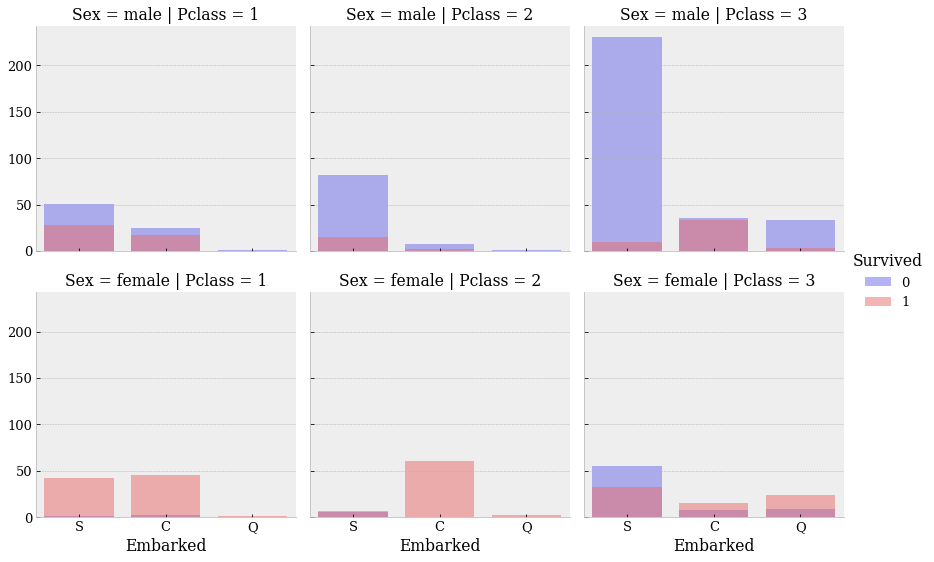

In [7]:
# 分析Survived,Sex，Pclass与Embarked之间的关系
grid = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.5)
grid.add_legend()

In [102]:
# 补充缺失值
#Age

# Cabin
# df[df['Cabin'].isnull()]
# print(df['Cabin'])

# # Embarked
# df[df['Embarked'].isnull()]
# # print(df['Embarked'])
# #补充Embarked中的缺失值
# #缺失的两个值均为1等仓，性别为女性，最终获救 ，通过前面分析判断，从C逃走的数量比S多，所以此处使用众数填充
# df['Embarked'] = df['Embarked'].fillna('C')

In [73]:
df.describe()
df.info()
#此时Age中没有缺失值
# df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
A              891 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 90.6+ KB


/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is curre

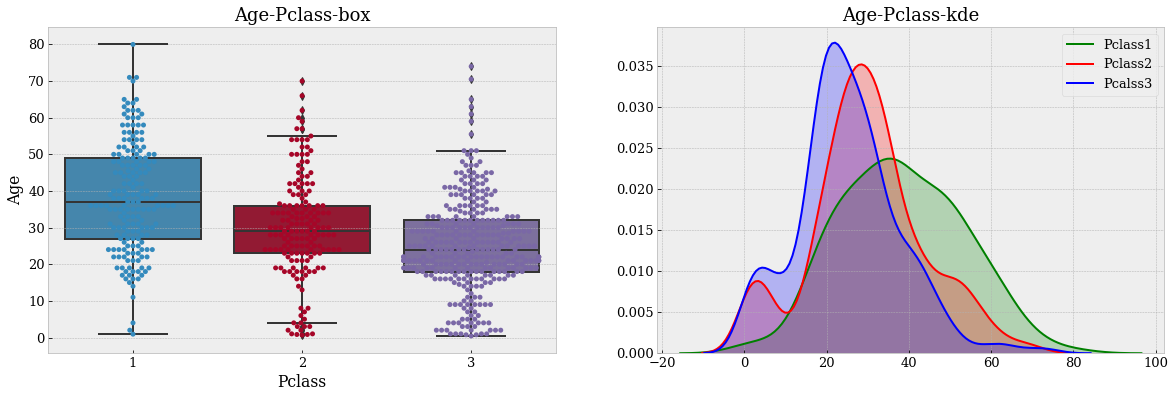

In [13]:

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Age", data=df, ax =ax1)
sns.swarmplot(x="Pclass", y="Age", data=df, ax=ax1)

sns.kdeplot(df.loc[(df['Pclass'] == 1),'Age'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(df.loc[(df['Pclass'] == 2),'Age'] , color='r',shade=True, label='Pclass2',ax=ax2)
sns.kdeplot(df.loc[(df['Pclass'] == 3),'Age'] , color='b',shade=True, label='Pcalss3',ax=ax2)

ax1.set_title('Age-Pclass-box', fontsize = 18)
ax2.set_title("Age-Pclass-kde", fontsize = 18)
fig.show()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


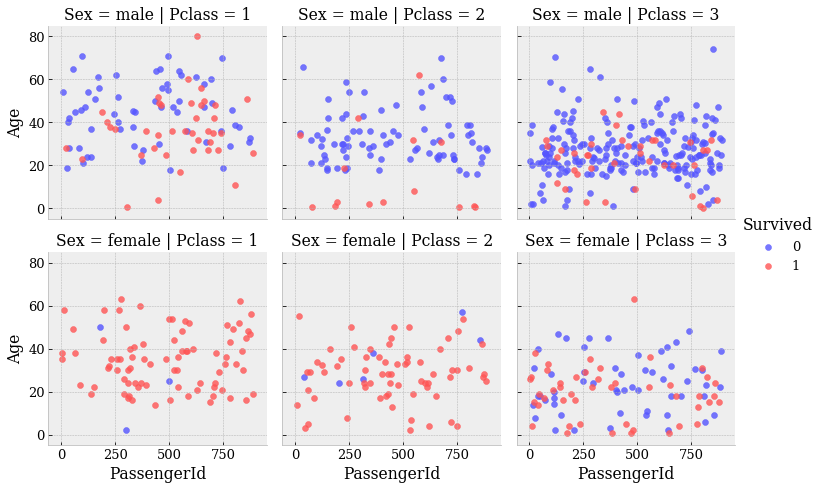

In [14]:
grid = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha=0.8)
grid.add_legend()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


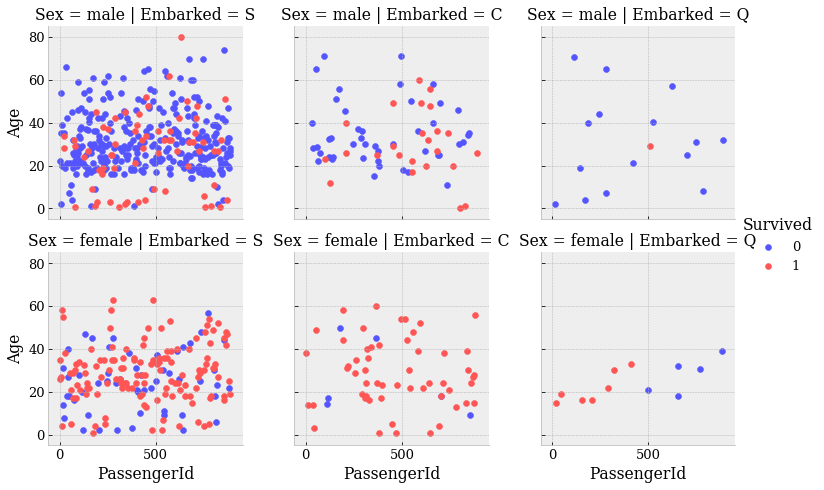

In [24]:
grid = sns.FacetGrid(df, col = "Embarked", row = "Sex", hue = "Survived", palette = 'seismic', size=3.5)
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

array([1, 0, 3, 4, 2, 5, 8])

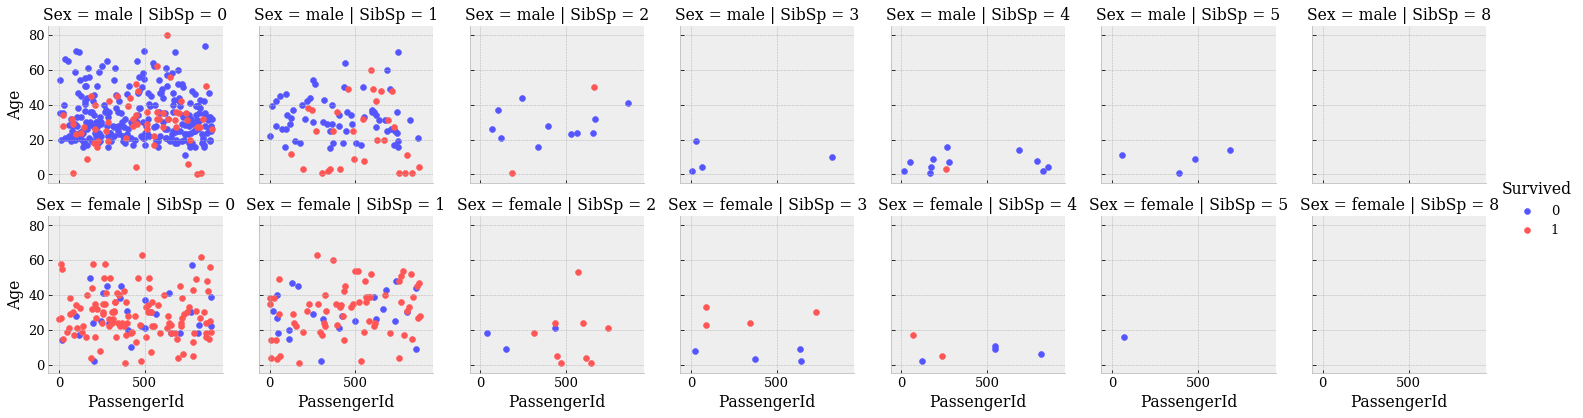

In [19]:
grid = sns.FacetGrid(df, col = "SibSp", row = "Sex", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()

df['SibSp'].unique()

array([0, 1, 2, 5, 3, 4, 6])

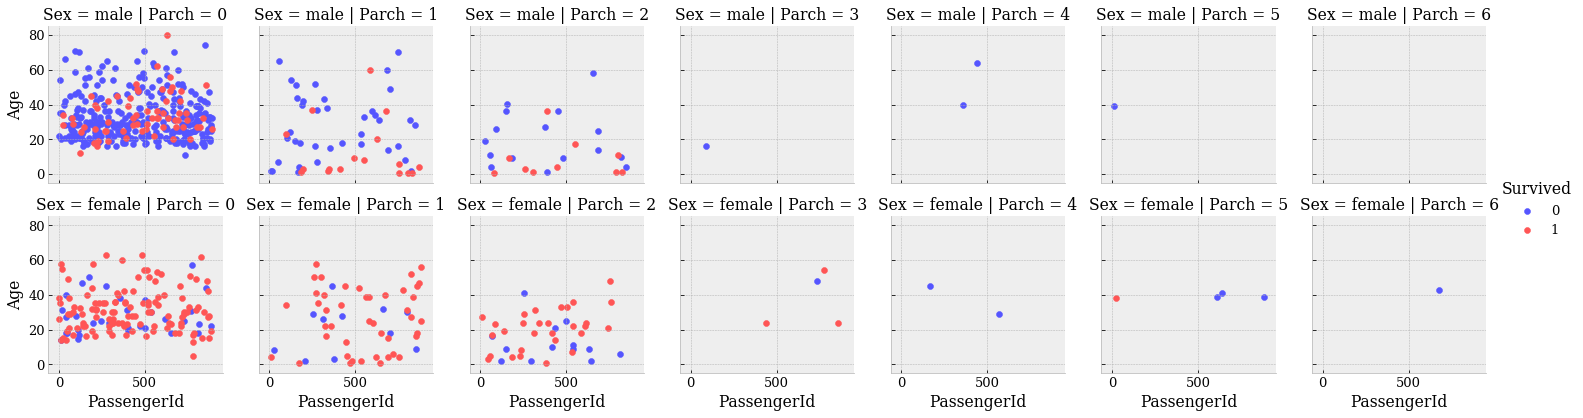

In [18]:
grid = sns.FacetGrid(df, col = "Parch", row = "Sex", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()

df['Parch'].unique()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


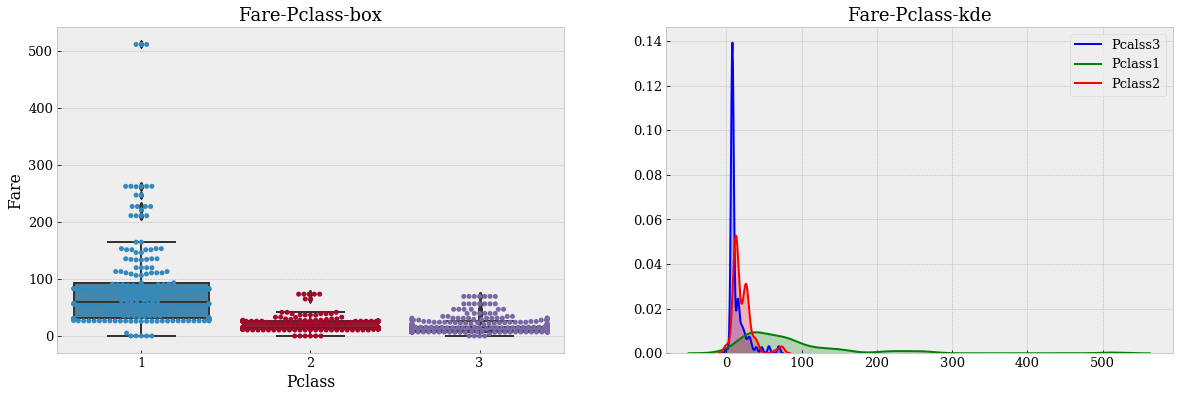

In [21]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Fare", data=df, ax =ax1)
sns.swarmplot(x="Pclass", y="Fare", data=df, ax =ax1)
sns.kdeplot(df.loc[(df['Pclass'] == 3),'Fare'] , color='b',shade=True, label='Pcalss3',ax=ax2)
sns.kdeplot(df.loc[(df['Pclass'] == 1),'Fare'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(df.loc[(df['Pclass'] == 2),'Fare'] , color='r',shade=True, label='Pclass2',ax=ax2)
ax1.set_title('Fare-Pclass-box', fontsize = 18)
ax2.set_title("Fare-Pclass-kde", fontsize = 18)
fig.show()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


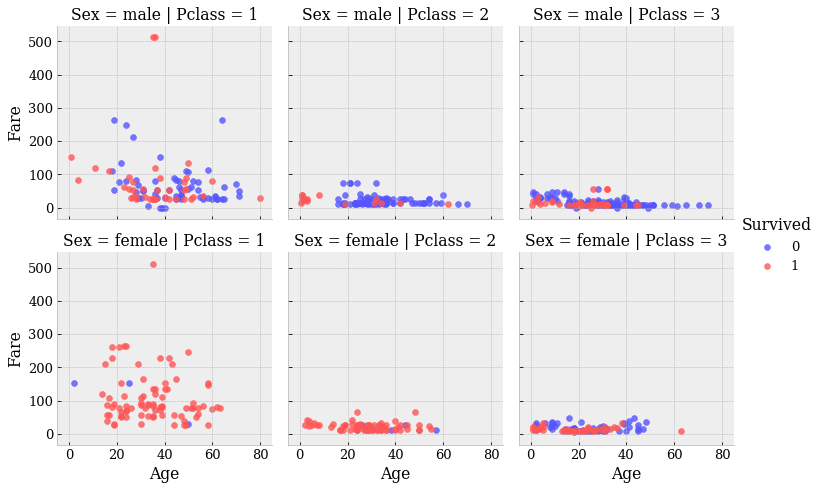

In [26]:
grid = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'Age', 'Fare', alpha=0.8)
grid.add_legend()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.5/dist-packages/statsmod

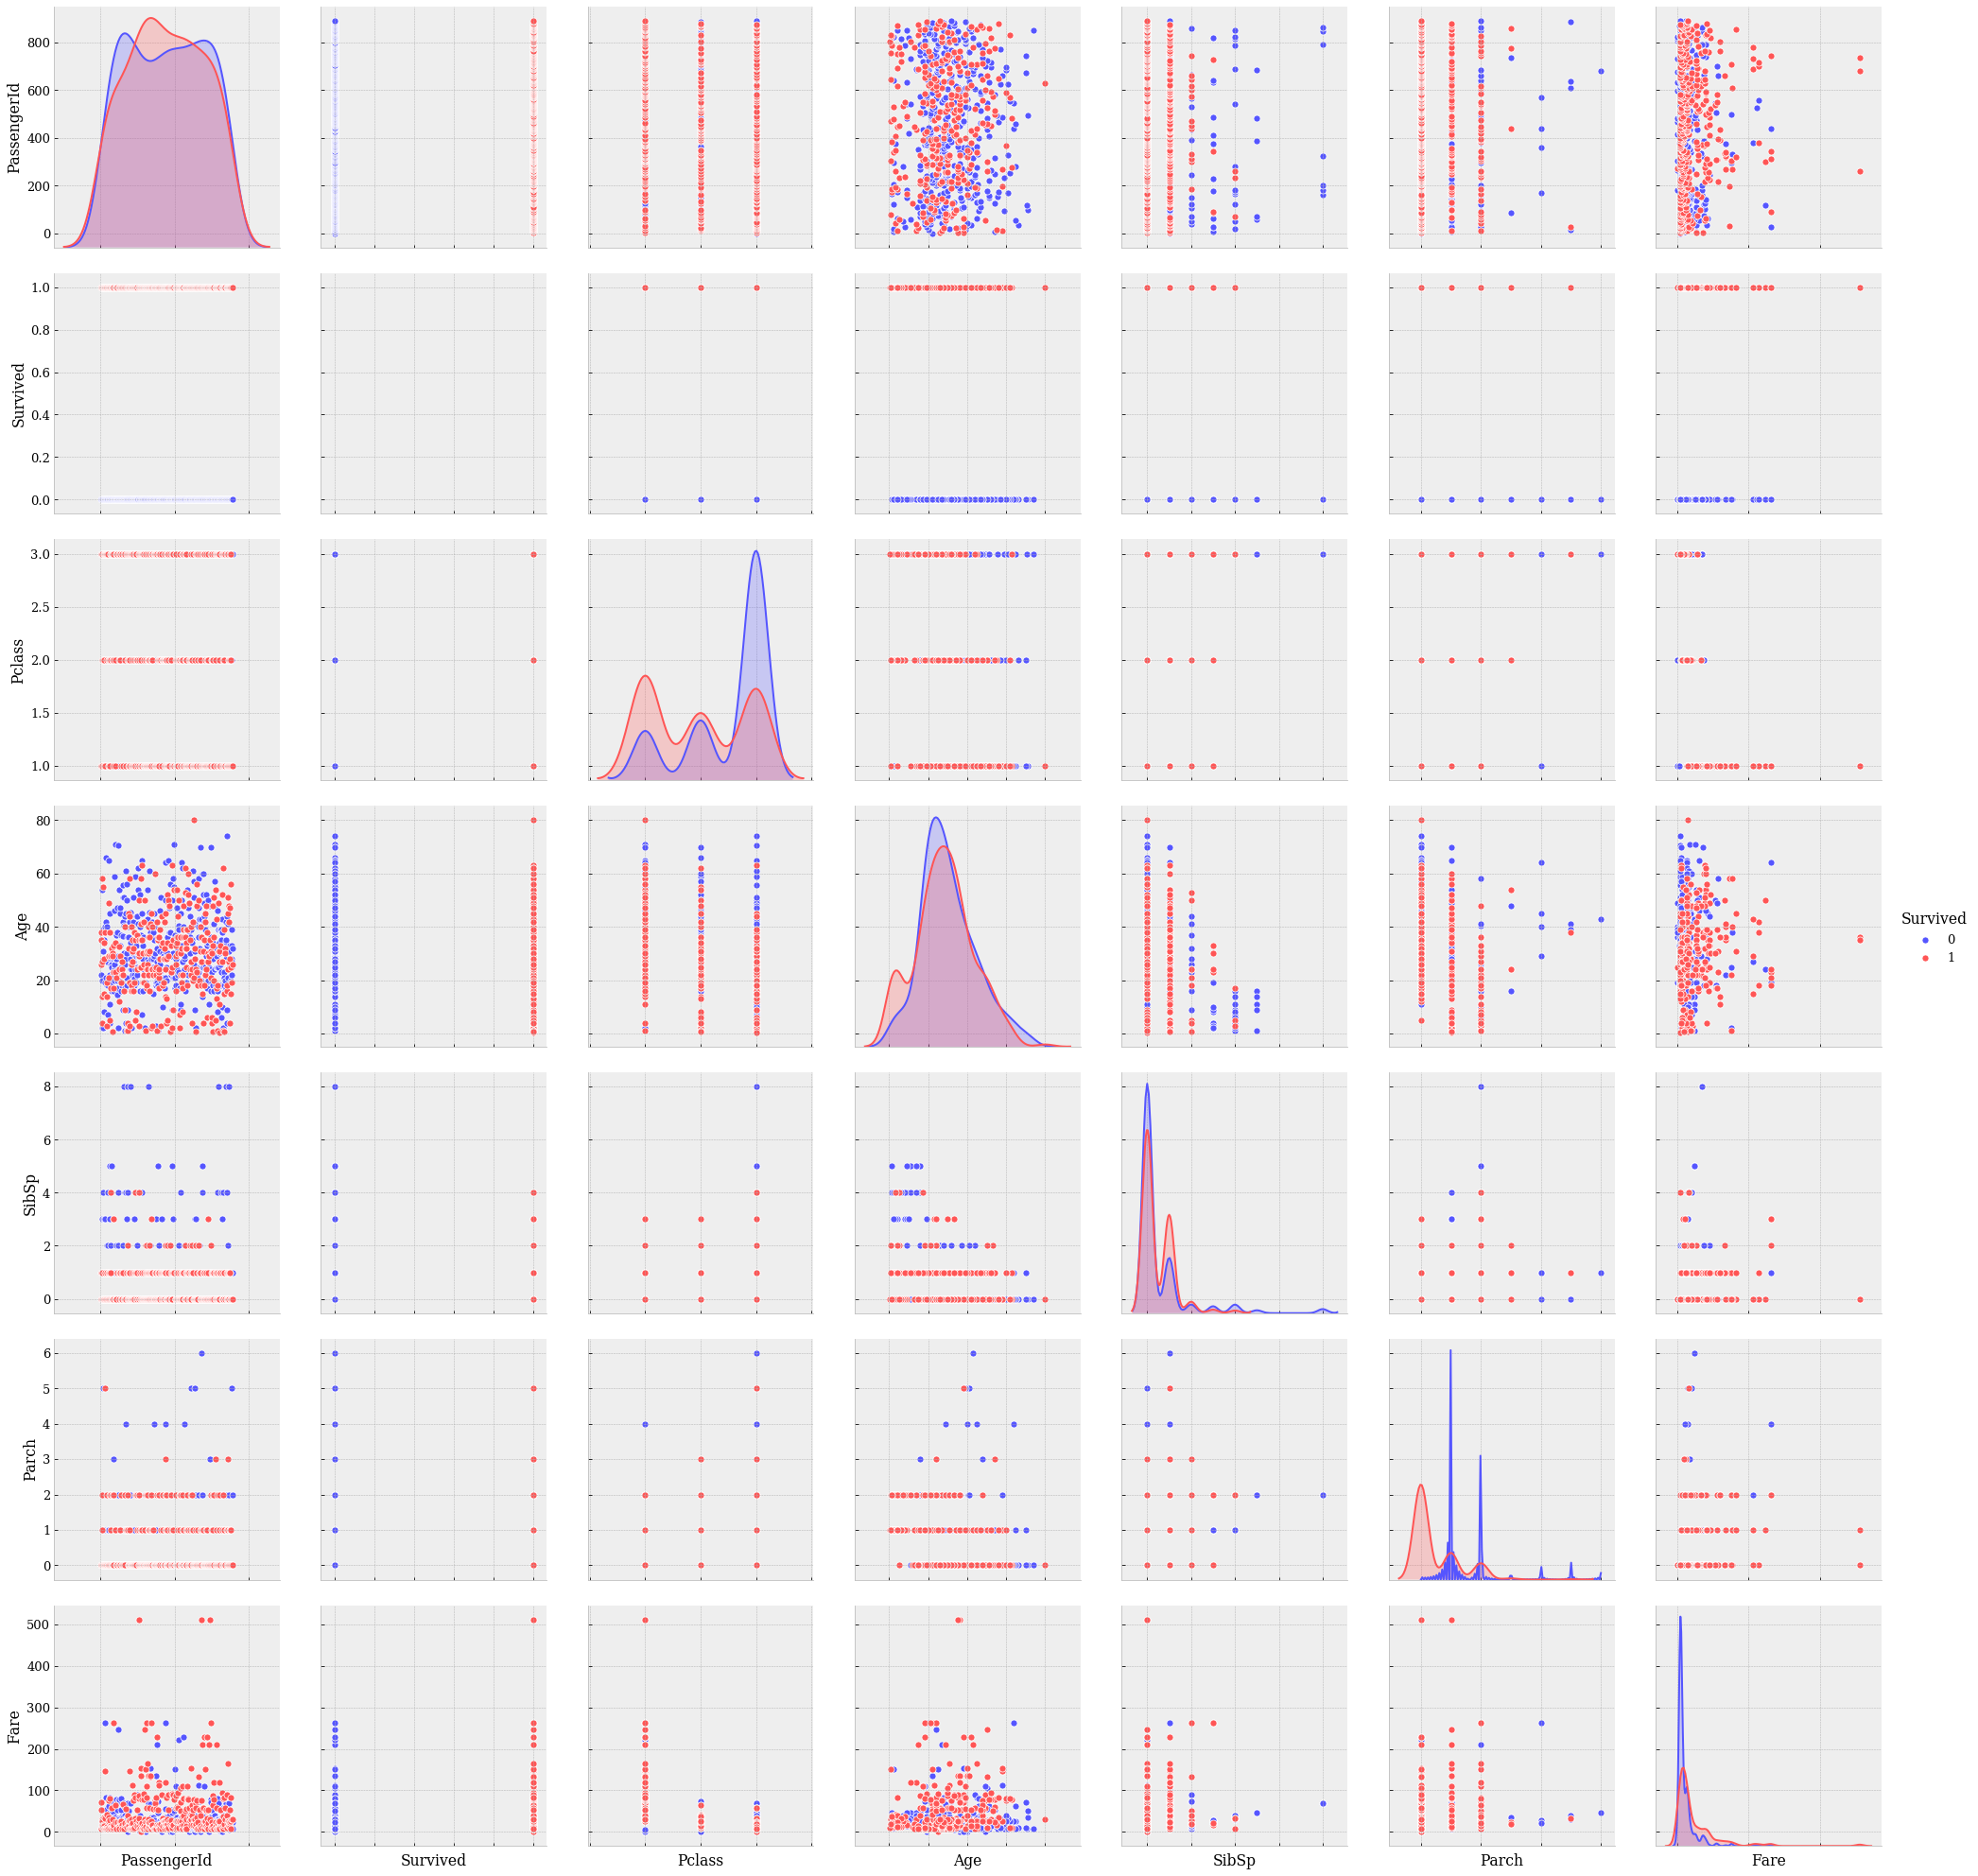

In [44]:
g = sns.pairplot(df, hue='Survived', palette = 'seismic',height=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50))
g.set(xticklabels=[])

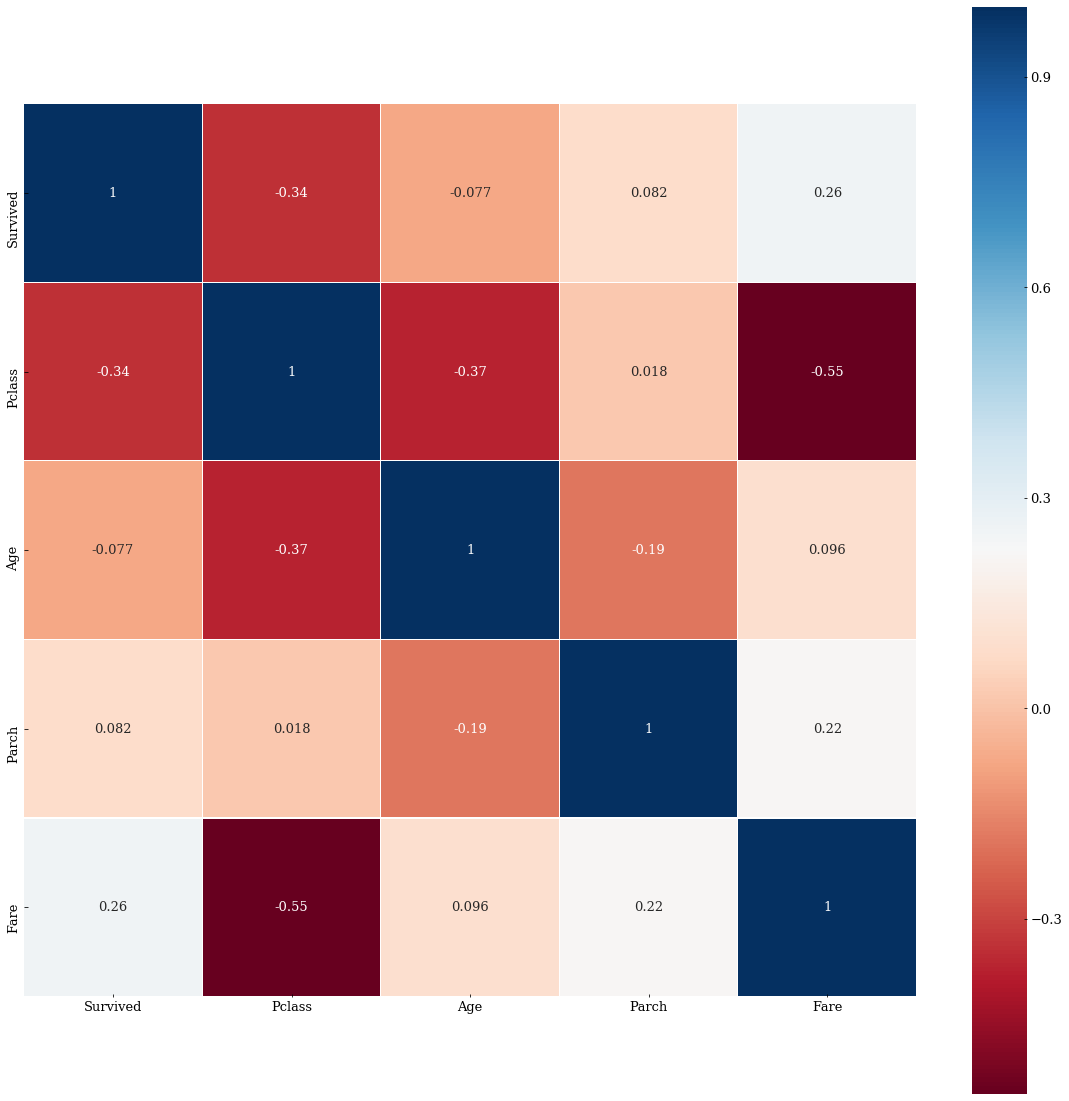

In [40]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']
features_selected = features
# data_corr 
df_corr = df[features_selected].copy()

colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df_corr.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [109]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold


df['Age'] = df['Age'].fillna(df['Age'].median())

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(df.shape[0], n_folds=100, random_state=1)


predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (df[predictors].iloc[train])
#     #The target we're using to train the algorithm.
    train_target = df["Survived"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(df[predictors].iloc[test,:])
    predictions.append(test_predictions)

# # print(predictions)

import numpy as np

# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
accuracy = sum(predictions[predictions == df["Survived"]]) / len(predictions)
print(accuracy)


# etr = ExtraTreesRegressor(n_estimators=200,random_state=0)
# X_train = df[classers][df['Age'].notnull()]
# Y_train = df['Age'][df['Age'].notnull()]
# X_test = df[classers][df['Age'].isnull()]

# etr.fit(X_train.as_matrix(),np.ravel(Y_train))
# age_preds = etr.predict(X_test.as_matrix())
# df['Age'][df['Age'].isnull()] = age_preds

# X_test['Age'] = pd.Series(age_preds)
# f,ax=plt.subplots(figsize=(10,5))
# sns.swarmplot(x='Pclass',y='Age',data=X_test)
# plt.show()




0.2671156004489338


In [79]:
# df["A"] = df["Age"][df["Age"].isnull()]
# # df["Embarked"] = df["Embarked"].fillna('S')
# df['A'] = df['A'].fillna(df['Age'][df['Age'].notnull().mean()])
# # df['A']
# df['Age'] = df['Age'].fillna(df['Age'].notnull().mean())
# df['Age']
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, df[predictors], df["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.797979797979798


In [110]:
#导测试集中的数据，并对Age,Fare,Embarked中的数据进行替换和增加 
titanic_test = pd.read_csv("test.csv")

titanic_test["Age"] = titanic_test["Age"].fillna(df["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())

titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1

titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0


In [114]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
kf = cross_validation.KFold(df.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, df[predictors], df["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.8125701459034792


In [90]:
# Generating a familysize column
df["FamilySize"] = df["SibSp"] + df["Parch"]

# The .apply method generates a new series
df["NameLength"] = df["Name"].apply(lambda x: len(x))

In [118]:
import re

# A function to get the title from a name.
#获取姓名的第一个单词
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search('([A-Za-z]+)\.', name)
#     print(title_search)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = df["Name"].apply(get_title)

print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
df["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Don           1
Sir           1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Capt          1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


[24.59567142 68.85199425  1.88886307  0.5342545   1.82976043 14.21323514
  2.85130099  0.20768458 26.98338607 23.69319016]


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

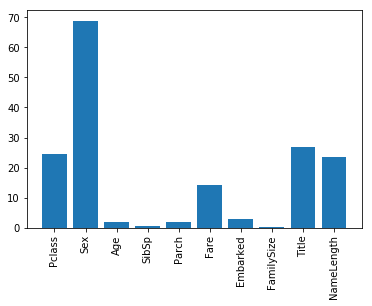

In [119]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(df[predictors], df["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

print(scores)
# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# Pick only the four best features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title",]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross validation folds
kf = KFold(df.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = df["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(df[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(df[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == df["Survived"]]) / len(predictions)
print(accuracy)


0.2772166105499439


In [100]:
titles = titanic_test["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Title"] = titles
# Check the counts of each unique title.
print(pd.value_counts(titanic_test["Title"]))

# Now, we add the family size column.
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64


In [101]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(df[predictors], df["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions

array([0.10830074, 0.49176774, 0.11825045, 0.1385656 , 0.53654907,
       0.13911441, 0.60575013, 0.18590596, 0.68682818, 0.1203842 ,
       0.13308825, 0.2040256 , 0.90964354, 0.10609094, 0.89077087,
       0.87028375, 0.1558047 , 0.14445475, 0.54639932, 0.57515464,
       0.30670876, 0.45026448, 0.9051703 , 0.35476165, 0.87595219,
       0.10005573, 0.91374759, 0.14283394, 0.2820757 , 0.131418  ,
       0.11420038, 0.16065097, 0.50087513, 0.44470882, 0.40461825,
       0.14730075, 0.4814764 , 0.55230507, 0.14031059, 0.27222012,
       0.10667471, 0.46251404, 0.09363468, 0.83404928, 0.90117032,
       0.17528261, 0.28470958, 0.14292869, 0.89292047, 0.4907786 ,
       0.33545789, 0.18034203, 0.83728794, 0.8733214 , 0.17869358,
       0.15406574, 0.0998115 , 0.13551798, 0.13267234, 0.91410475,
       0.14304003, 0.16337171, 0.1419721 , 0.6736713 , 0.71165923,
       0.86796578, 0.68062405, 0.27293805, 0.36495799, 0.84263719,
       0.65252044, 0.1390016 , 0.5231852 , 0.37040878, 0.91246